# Creating bar chart race of UK local authority charging device installation
Going to use bar_chart_race in matplotlib

In [93]:
#Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#import ffmpeg
# import bar_chart_race as bcr
# plt.rcParams['animation.ffmpeg_path'] = 'c:/ffmpeg'

In [94]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=6, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

In [95]:
df = pd.read_excel('https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/959367/electric-vehicle-charging-device-statistics-january-2021.ods', sheet_name = 'EVCD_01a')

In [96]:
#df.head(10)

First job is to clean up the data by removing rows and creating column titles. We've got two sets of data: absolute charger numbers, and per 100,000 pop. We'll split this into two dataframes, and clean them up. 

In [97]:
df_tot = df.drop(columns = ['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13'], axis = 'columns')
df_pop = df.drop(columns = ['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12'], axis = 'columns')

In [98]:
#df_pop.head(10)

In [99]:
#Clean up bumpf and create new column headers.
df_pop.iloc[6]
# new_header['la_code', 'la_name', '2021-01-01', '2020-10-01', '2020-07-01', '2020-01-01', '2019-01-01']
df_pop = df_pop[7:]
df_tot = df_tot[7:]

df_pop.rename(columns = {'Department for Transport statistics': 'la_code', 'Unnamed: 1': 'la_name', 'Unnamed: 3': '2021-01-01', 'Unnamed: 5': '2020-10-01', 'Unnamed: 7': '2020-07-01', 'Unnamed: 9': '2020-04-01', 'Unnamed: 11': '2020-01-01', 'Unnamed: 13': '2019-10-01'}, inplace = True)
df_tot.rename(columns = {'Department for Transport statistics': 'la_code', 'Unnamed: 1': 'la_name', 'Unnamed: 2': '2021-01-01', 'Unnamed: 4': '2020-10-01', 'Unnamed: 6': '2020-07-01', 'Unnamed: 8': '2020-04-01', 'Unnamed: 10': '2020-01-01', 'Unnamed: 12': '2019-10-01'}, inplace = True)

In [100]:
df_pop.head()

,la_code,la_name,2021-01-01,2020-10-01,2020-07-01,2020-04-01,2020-01-01,2019-10-01
7,K02000001,UNITED KINGDOM,31.1018,29.1736,27.3396,27.0142,24.8436,22.7529
8,K03000001,GREAT BRITAIN,31.5162,29.5348,27.6566,27.3291,25.1108,22.9591
9,E92000001,ENGLAND,31.0178,29.2359,27.3456,26.7591,24.5082,22.4181
10,E12000001,NORTH EAST,30.7123,31.7985,30.4127,29.5721,28.2929,27.7662
11,E06000047,County Durham,20.751,19.9965,19.8078,19.3556,18.217,17.458


In [101]:
df_tot.head()

,la_code,la_name,2021-01-01,2020-10-01,2020-07-01,2020-04-01,2020-01-01,2019-10-01
7,K02000001,UNITED KINGDOM,20775,19487,18265,17947,16505,15116
8,K03000001,GREAT BRITAIN,20455,19169,17953,17642,16210,14821
9,E92000001,ENGLAND,17459,16456,15395,14979,13719,12549
10,E12000001,NORTH EAST,820,849,812,786,752,738
11,E06000047,County Durham,110,106,105,102,96,92


One remaining issue is that the tail of the dataframes still have some bumpf:

In [102]:
df_tot.tail(15)

,la_code,la_name,2021-01-01,2020-10-01,2020-07-01,2020-04-01,2020-01-01,2019-10-01
433,N09000009,Mid Ulster,22,22,22,22,22,23
434,N09000010,"Newry, Mourne and Down",31,31,31,31,31,31
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,Charging device location data is sourced from ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,The table shows the total number of charging d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,‘Total devices’ represent publicly available c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Cleaned up tail bumpf by dropping nas
df_tot.dropna(inplace=True)
df_pop.dropna(inplace=True)

Some place names are followed by '(Met County)', and some are very lengthy, e.g. North East Lincolnshire'. This should be appreviated to make our graphics look nice.

In [104]:
df_tot['la_name'] = df_tot['la_name'].str.replace(' (Met County) ', '')
df_pop['la_name'] = df_tot['la_name'].str.replace(' (Met County) ', '')

In [105]:
df_tot['la_name'] = df_tot['la_name'].str.replace('South ', 'S. ')
df_pop['la_name'] = df_tot['la_name'].str.replace('South ', 'S. ')

In [106]:
df_tot['la_name'] = df_tot['la_name'].str.replace('West ', 'W. ')
df_pop['la_name'] = df_tot['la_name'].str.replace('West ', 'W. ')

In [107]:
df_tot['la_name'] = df_tot['la_name'].str.replace('North East ', 'N.E. ')
df_pop['la_name'] = df_tot['la_name'].str.replace('North East ', 'N.E. ')

In [108]:
df_tot['la_name'] = df_tot['la_name'].str.replace('Kingston upon Hull, City of', 'Hull')
df_pop['la_name'] = df_tot['la_name'].str.replace('Kingston upon Hull, City of', 'Hull')

In [109]:
df_tot['la_name'] = df_tot['la_name'].str.replace('East Riding of Yorkshire', 'E. Riding')
df_pop['la_name'] = df_tot['la_name'].str.replace('East Riding of Yorkshire', 'E. Riding')

## Select your desired location here, using regex to look for particular la_codes. 
For df_pop, let's get granular and select only lower tier local authorities. la_code is the trick here. All lower tier authorities start with E, S, or N, followed by 0

In [110]:
# English counties and inner & outer London
# df_pop_la = df_pop[df_pop.la_code.str.contains(r'[E][0][9]')]
# df_pop_la.shape

In [111]:
# Yorkshire councils
# yrks = ['E06000011', 'E06000010', 'E06000014', 'E07000163', 'E07000164', 'E07000165', 'E07000166', 'E07000167', 'E07000168',
# 'E07000169', 'E08000016', 'E08000017', 'E08000018', 'E08000019', 'E08000032', 'E08000033', 'E08000034', 'E08000035', 'E08000036']
# df_pop_la = df_pop[df_pop['la_code'].isin(yrks)]
# df_pop_la.head()

In [112]:
df_pop_la = df_pop[df_pop.la_code.str.contains(r'N')]
df_pop_la.shape


(12, 8)

## Now to create a bar chart race

We're following this tutorial. https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib

Data must be 'wide', i.e. it must have each line representing a single date. Our data is the 'wrong way around'...

In [113]:
df_pop_la_t = df_pop_la.drop(columns='la_code').transpose()

In [114]:
#Make the first row the new header and then delete the first row
new_header = df_pop_la_t.iloc[0]
df_pop_la_t.columns = new_header
df_pop_la_t = df_pop_la_t[1:]

#reverse the data so past is first!
df_pop_la_t = df_pop_la_t.iloc[::-1]

In [115]:
#df_pop_la_t.head()

In [116]:
#Set colorscheme 
colors = plt.cm.Dark2(range(6))

Ok, our data is now 'wide'.

Uncomment the following to see some experimentation with the data.

Let's start by creating a static bar chart for our LAs on one specific date, January 2021.

In [117]:
# jan = df_pop_la_t.loc['2021-01-01']
# jan

In [118]:
# fig, ax = plt.subplots(figsize = (4, 10), dpi = 144)
# colors = plt.cm.Dark2(range(6))
# y = jan.index
# width = jan.values
# ax.barh(y=y, width = width, color = colors)

### Plot some consecutive periods, ordering the bars
For a bar chart race, the bars are ordered from largest to smallest with largest at the top

c:\users\ben\.conda\envs\chargerbars\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


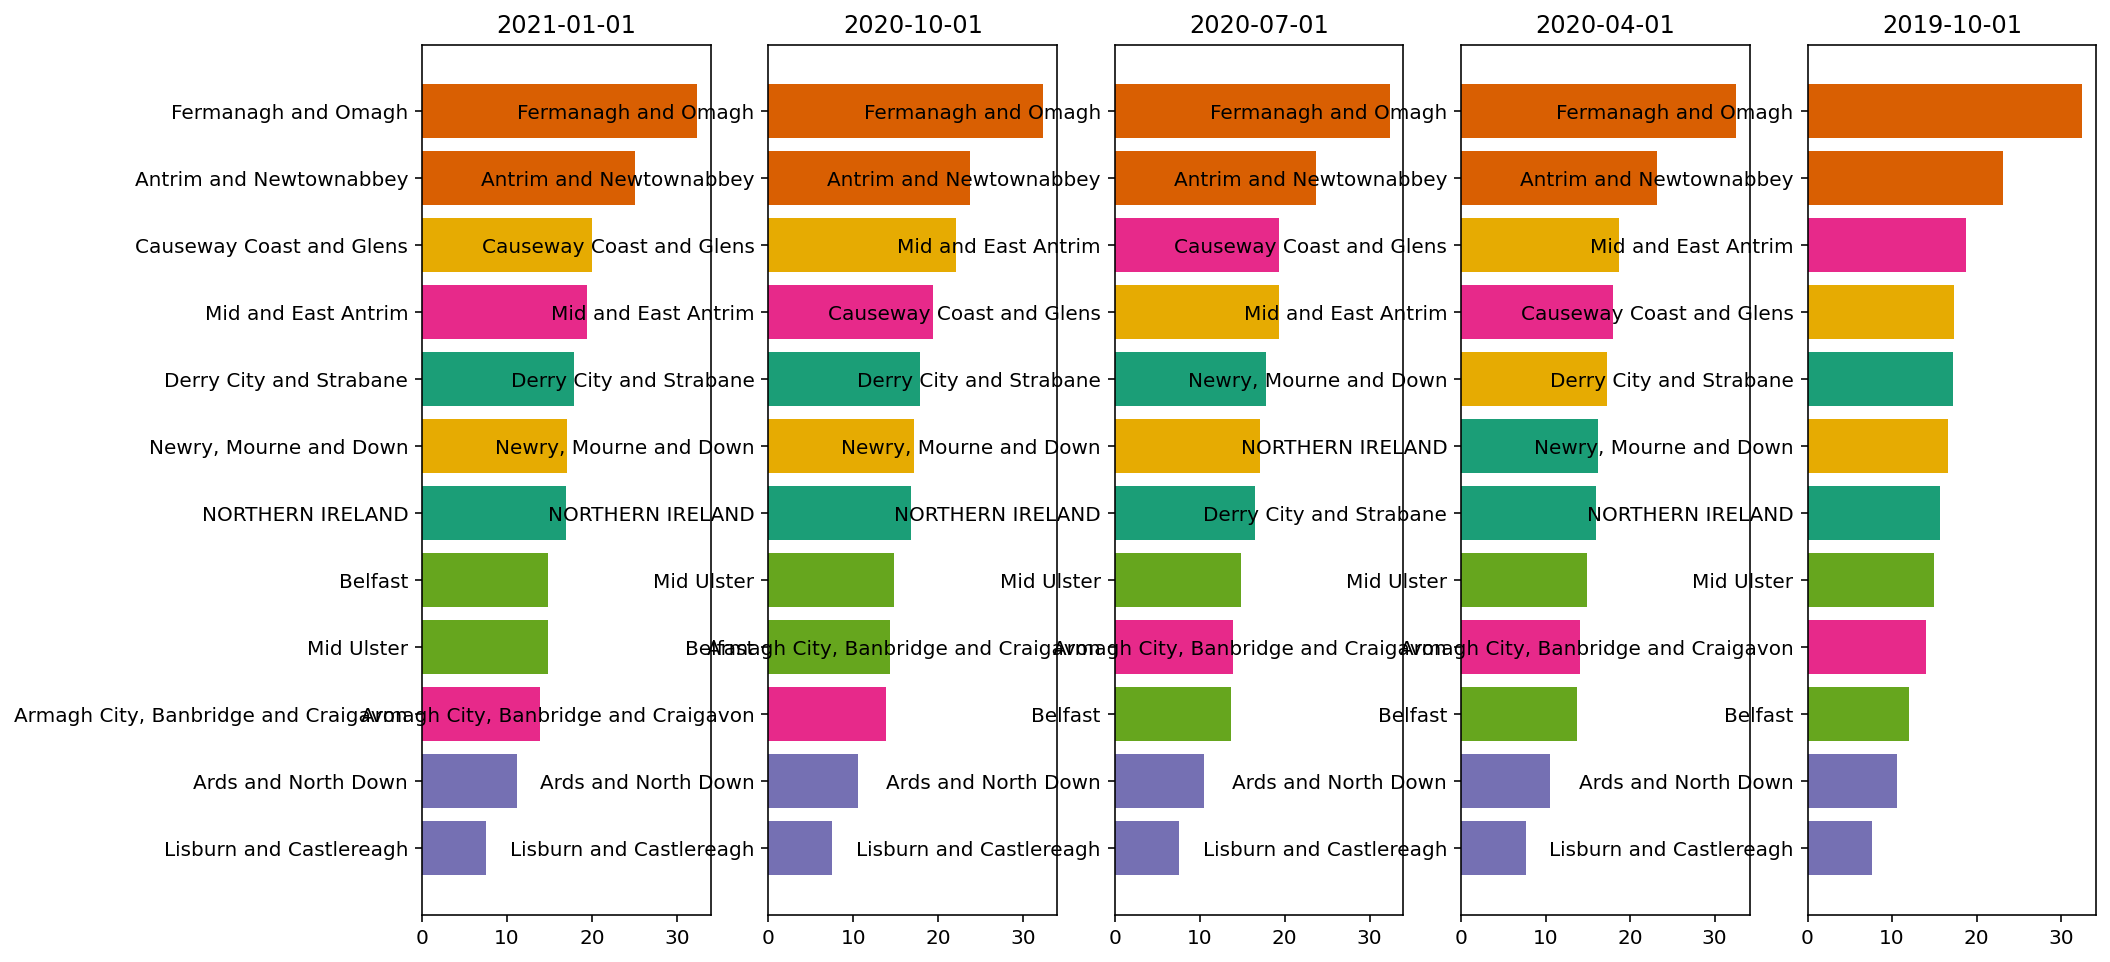

In [119]:
fig, ax_array = plt.subplots(nrows = 1, ncols=5, figsize=(15, 8), dpi=144, tight_layout=True)
dates = ['2021-01-01', '2020-10-01', '2020-07-01', '2020-04-01', '2019-10-01']
for ax, date in zip(ax_array, dates):
    s = df_pop_la_t.loc[date]
    y = pd.to_numeric(df_pop_la_t.loc[date]).rank(method = 'first')
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date)
#     nice_axes(ax)

Looking pretty good, although the text is perhaps a tad big... 

We need to expand the index and interpolate between the points to add enough frames.

In [120]:
df2 = df_pop_la_t.loc['2019-10-01':'2021-01-01']
df2.index.name = None
df_new = df2

In [121]:
# df2.head()

In [122]:
df2 = df2.reset_index()
df2.rename(columns = {'index': 'date', 'la_code': ''}, inplace=True)
df2.index.names = ['index']
df2.columns.names = ['']
# df2.head()

In [123]:
c = df2.columns.tolist()
# c[1:]

In [124]:
df2[c[1:]] = df2[c[1:]].astype(int)

## Edit here to change number of frames in animation...

In [125]:
#Change the multiple below to edit the quality of the animation. A higher number will generate more frames, meaning a higher quality animation.
#NB more frames -> bigger file
df2.index = df2.index * 40

In [126]:
# df2 = df2.convert_dtypes(convert_integer = True)
df2['date'] = pd.to_datetime(df2['date'])
# df2.head()

In [127]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
# df_expanded

In [128]:
df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('date')
# df_expanded.head()

In [129]:
df_rank_expanded = df_expanded.rank(axis = 1, method='first')
# df_rank_expanded

In [130]:
df_expanded = df_expanded.interpolate()
# df_expanded.head()

In [131]:
df_rank_expanded = df_rank_expanded.interpolate()

In [132]:
# df_rank_expanded.head()

In [133]:
df_expanded.shape

(201, 12)

In [134]:
df_rank_expanded.shape

(201, 12)

## Plot each step of the transition
The interpolated ranks will serve as the new position of the bars along the y-axis.

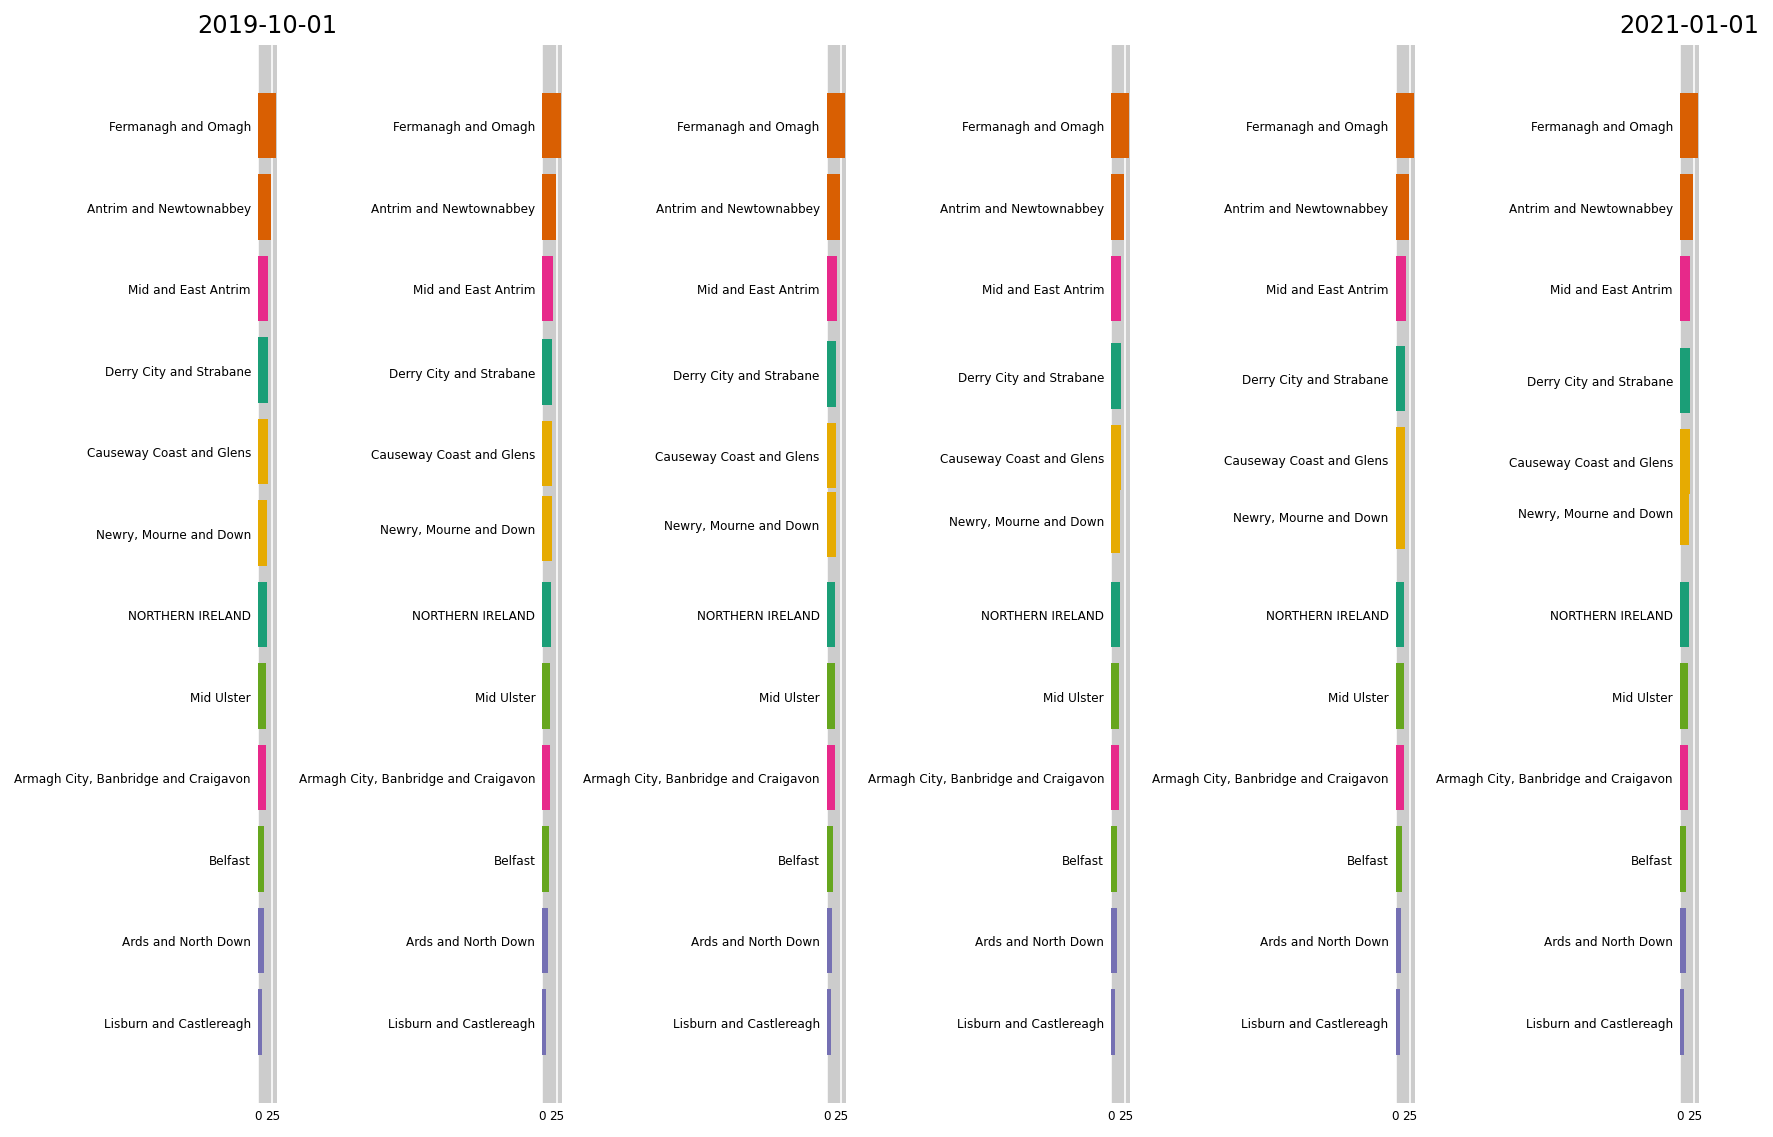

In [135]:
fig, ax_array = plt.subplots(nrows = 1, ncols = 6, figsize = (12, 8), dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width = width, color = colors, tick_label=labels)
    nice_axes(ax)
    ax_array[0].set_title('2019-10-01')
    ax_array[-1].set_title('2021-01-01')

## Writing the animation

Each row in our data represents a single frame in our animation....

In [136]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %Y')
    ax.set_title(f'Public EV chargers in London per 100,000 people - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(6, 4), dpi=600)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=1000, repeat=False)

In [137]:
anim.save('anim.gif', dpi = 180, fps=50)

In [138]:
anim.save('anim.mp4', dpi = 400, fps=50)